In [165]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle

In [166]:
# Load in json
gdf = gpd.read_file("C:/Users/mford.MSBIOWORKS/Project_1/gz_2010_us_040_00_5m.json")
# print(monthly_energy_production_df)
gdf.head(5)

# us_states = gpd.read_file('us_states.geojson')

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [167]:
unique_states = gdf['NAME'].unique()
print(unique_states)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Puerto Rico']


In [168]:
row_count = len(gdf)
print("Number of rows in the DataFrame:", row_count)

Number of rows in the DataFrame: 52


In [169]:
value_to_delete = ['Alabama', 'Alaska', 'District of Columbia', 'Florida', 'Georgia','Hawaii', 'Kentucky', 'Louisiana', 'Mississippi', 'South Carolina', 'Virginia' ,'Puerto Rico'  ]
gdf = gdf[~gdf['NAME'].isin(value_to_delete)]

In [170]:
gdf.sort_values(by='NAME', ascending=True, inplace = True)
gdf.head(5)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."
5,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.19055 40.99761, -106.06118 40.9..."
6,0400000US09,09,Connecticut,,4842.355,"POLYGON ((-71.79924 42.00807, -71.79792 41.935..."


In [171]:
gdf.reset_index(drop=True, inplace=True)

In [172]:
print(df)

             State  Count
26         Arizona    324
41        Arkansas      1
4       California   3857
6         Colorado   2825
40     Connecticut      3
42        Delaware      1
21           Idaho    541
5         Illinois   3557
13         Indiana   1602
1             Iowa   6284
3           Kansas   3927
25           Maine    416
33        Maryland     80
31   Massachusetts     91
12        Michigan   1637
7        Minnesota   2700
18        Missouri   1081
19         Montana    795
14        Nebraska   1480
35          Nevada     66
32   New Hampshire     84
39      New Jersey      6
10      New Mexico   1923
17        New York   1259
30  North Carolina    104
9     North Dakota   2086
22            Ohio    492
2         Oklahoma   5344
8           Oregon   2113
20    Pennsylvania    751
37    Rhode Island     30
16    South Dakota   1327
38       Tennessee     18
0            Texas  18322
27            Utah    205
34         Vermont     73
11      Washington   1822
24   West Vi

In [173]:
unique_states = gdf['NAME'].unique()
print(unique_states)

['Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut' 'Delaware'
 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Missouri' 'Montana' 'Nebraska'
 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [174]:
row_count = len(gdf)
print("Number of rows in the DataFrame:", row_count)

Number of rows in the DataFrame: 40


In [175]:
gdf.head(42)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
1,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
2,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."
3,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.19055 40.99761, -106.06118 40.9..."
4,0400000US09,09,Connecticut,,4842.355,"POLYGON ((-71.79924 42.00807, -71.79792 41.935..."
5,0400000US10,10,Delaware,,1948.543,"MULTIPOLYGON (((-75.56493 39.58325, -75.57627 ..."
6,0400000US16,16,Idaho,,82643.117,"POLYGON ((-111.04416 43.02005, -111.04413 43.0..."
7,0400000US17,17,Illinois,,55518.930,"POLYGON ((-89.36603 42.50027, -89.36156 42.500..."
8,0400000US18,18,Indiana,,35826.109,"POLYGON ((-84.80248 40.52805, -84.80255 40.501..."
9,0400000US19,19,Iowa,,55857.130,"POLYGON ((-91.21771 43.50055, -91.21827 43.497..."


In [176]:
print(gdf.columns)

Index(['GEO_ID', 'STATE', 'NAME', 'LSAD', 'CENSUSAREA', 'geometry'], dtype='object')


In [177]:
df = pd.read_csv("C:/Users/mford.MSBIOWORKS/Project_1/state_counts.csv")
# print(monthly_energy_production_df)
df.head(5)

,State,Count
0,Texas,18322
1,Iowa,6284
2,Oklahoma,5344
3,Kansas,3927
4,California,3857


In [178]:
df.sort_values(by='State', ascending=True, inplace = True)
df.head(5)


,State,Count
29,Alaska,117
26,Arizona,324
41,Arkansas,1
4,California,3857
6,Colorado,2825


In [179]:
# row_count = len(df)
# print("Number of rows in the DataFrame:", row_count)
print(df)

             State  Count
29          Alaska    117
26         Arizona    324
41        Arkansas      1
4       California   3857
6         Colorado   2825
40     Connecticut      3
42        Delaware      1
28          Hawaii    127
21           Idaho    541
5         Illinois   3557
13         Indiana   1602
1             Iowa   6284
3           Kansas   3927
25           Maine    416
33        Maryland     80
31   Massachusetts     91
12        Michigan   1637
7        Minnesota   2700
18        Missouri   1081
19         Montana    795
14        Nebraska   1480
35          Nevada     66
32   New Hampshire     84
39      New Jersey      6
10      New Mexico   1923
17        New York   1259
30  North Carolina    104
9     North Dakota   2086
22            Ohio    492
2         Oklahoma   5344
8           Oregon   2113
20    Pennsylvania    751
36     Puerto Rico     60
37    Rhode Island     30
16    South Dakota   1327
38       Tennessee     18
0            Texas  18322
27          

In [180]:
# df.index[df.index.duplicated()]

In [181]:
# df.index.nunique()

In [182]:

# import pandas as pd

# # Define the expected index range (0 to 39)
# expected_index_range = range(40)

# # Get the actual index labels in the DataFrame
# actual_index_labels = df.index.tolist()

# # Find missing index labels
# missing_index_labels = [label for label in expected_index_range if label not in actual_index_labels]

# print("Missing Index Labels:", missing_index_labels)

In [183]:
# # Check for duplicate rows based on the values in the DataFrame
# duplicate_rows = df[df.duplicated(keep=False)]

# # Print the duplicate rows, if any
# print("Duplicate Rows:")
# print(duplicate_rows)

In [184]:
unique_states = df['State'].unique()
print(unique_states)


['Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut'
 'Delaware' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Maine'
 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [185]:
value_to_delete_2 = ['Alaska', 'Hawaii','Puerto Rico']
df = df[~df['State'].isin(value_to_delete_2)]

In [186]:
print(df)

             State  Count
26         Arizona    324
41        Arkansas      1
4       California   3857
6         Colorado   2825
40     Connecticut      3
42        Delaware      1
21           Idaho    541
5         Illinois   3557
13         Indiana   1602
1             Iowa   6284
3           Kansas   3927
25           Maine    416
33        Maryland     80
31   Massachusetts     91
12        Michigan   1637
7        Minnesota   2700
18        Missouri   1081
19         Montana    795
14        Nebraska   1480
35          Nevada     66
32   New Hampshire     84
39      New Jersey      6
10      New Mexico   1923
17        New York   1259
30  North Carolina    104
9     North Dakota   2086
22            Ohio    492
2         Oklahoma   5344
8           Oregon   2113
20    Pennsylvania    751
37    Rhode Island     30
16    South Dakota   1327
38       Tennessee     18
0            Texas  18322
27            Utah    205
34         Vermont     73
11      Washington   1822
24   West Vi

In [187]:
row_count = len(df)
print("Number of rows in the DataFrame:", row_count)
gdf.head(5)

Number of rows in the DataFrame: 40


,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
1,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
2,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."
3,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.19055 40.99761, -106.06118 40.9..."
4,0400000US09,09,Connecticut,,4842.355,"POLYGON ((-71.79924 42.00807, -71.79792 41.935..."


In [188]:
# Merge the GeoDataFrame with your data based on a common column (e.g., 'State' column)
merged_data = gdf.merge(df, left_on='NAME', right_on='State', how='left')


In [189]:
row_count = len(merged_data)
print("Number of rows in the DataFrame:", row_count)

Number of rows in the DataFrame: 40


In [190]:
# data_types = dfClusterMap.dtypes
# print(data_types)

In [191]:
merged_data.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,State,Count
0,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...",Arizona,324
1,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...",Arkansas,1
2,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213...",California,3857
3,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.19055 40.99761, -106.06118 40.9...",Colorado,2825
4,0400000US09,09,Connecticut,,4842.355,"POLYGON ((-71.79924 42.00807, -71.79792 41.935...",Connecticut,3


C:\Users\mford.MSBIOWORKS\AppData\Local\Temp\ipykernel_25216\418976361.py:55: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['Count']):


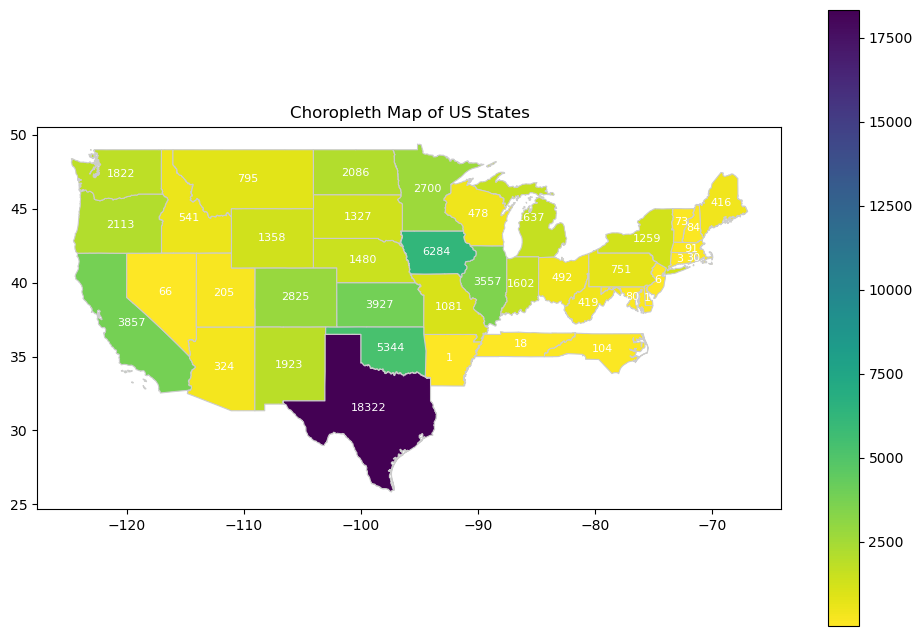

In [207]:
# # Reproject the GeoDataFrame to a projected CRS
# # You can choose an appropriate CRS based on your data and visualization requirements
# # For example, you can use an Albers Equal Area projection for the United States
# merged_data = merged_data.to_crs(epsg=5070)  # Replace 'epsg=5070' with the CRS of your choice

# # Calculate the centroids of state geometries
# merged_data['centroid'] = merged_data['geometry'].centroid

# # Create a figure and axis
# fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# # Plot the US map with state geometries
# merged_data.plot(ax=ax, color='lightgray', edgecolor='black')

# # Create bubbles using scatter plot
# # Extract x and y coordinates from the 'centroid' column
# x_coords = merged_data['centroid'].x
# y_coords = merged_data['centroid'].y

# # 'count' values for bubble sizes and colors
# count_values = merged_data['Count']

# # Scale the 'count' values for smaller bubbles
# s = count_values * 0.3  # Adjust the scaling factor as needed

# # Create a colormap to map 'count' values to colors
# cmap = plt.get_cmap('Spectral')

# # Normalize 'count' values to the colormap range
# # You can adjust the normalization range to make the color gradient more sensitive
# vmin = min(count_values)
# vmax = max(count_values)
# norm = Normalize(vmin=vmin, vmax=vmax)

# # Map 'count' values to colors
# colors = [cmap(norm(count)) for count in count_values]

# # Use extracted coordinates, scaled bubble sizes, and colors for the scatter plot
# ax.scatter(x_coords, y_coords, s=s, c=colors, edgecolor='black')

# for i, txt in enumerate(count_values):
#     ax.annotate(txt, (x_coords.iloc[i], y_coords.iloc[i]), ha='center', va='center', fontsize=16)

# # Set the title
# plt.title('Bubble Plot of US States')

# # Show the plot
# plt.show()

########################################################################

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='Count', cmap='viridis_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['Count']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='white')


plt.title('Choropleth Map of US States')
plt.show()

########################################################################

# # Replace 'gdf' with your GeoDataFrame and 'value_column' with your quantitative value column
# log_values = np.log1p(merged_data['Count'])  # Apply logarithm to your data

# # Create a logarithmic color scale
# norm = LogNorm(vmin=log_values.min(), vmax=log_values.max())
# cmap = plt.get_cmap('YlGnBu')

# # Plot the GeoDataFrame with a logarithmic color scale
# fig, ax = plt.subplots(figsize=(12, 8))
# gdf.plot(column=log_values, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', norm=norm, legend=True)
# plt.title('Heatmap with Logarithmic Color Scale')
# plt.show()


##########################################################################


# # Replace 'gdf' with your GeoDataFrame and 'value_column' with your quantitative value column
# log_values_base_2 = np.log2(merged_data['Count'] + 1)  # Apply logarithm to base 2 to your data

# # Create a logarithmic color scale
# vmin = log_values_base_2.min()
# vmax = log_values_base_2.max()
# norm = LogNorm(vmin=vmin, vmax=vmax)
# cmap = plt.get_cmap('YlGnBu')

# # Plot the GeoDataFrame with a logarithmic color scale to base 2
# fig, ax = plt.subplots(figsize=(12, 8))
# merged_data.plot(column=log_values_base_2, cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=norm)

# # Customize the legend label
# cax = fig.get_axes()[1]
# cax.set_ylabel("Log2 Scale")

# plt.title('Heatmap with Logarithmic (Base 2) Color Scale')
# plt.show()




